In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-1810-dpl-302-m-butterfly-image-classification/Training_set.csv
/kaggle/input/ai-1810-dpl-302-m-butterfly-image-classification/test/test/Image_747.jpg
/kaggle/input/ai-1810-dpl-302-m-butterfly-image-classification/test/test/Image_561.jpg
/kaggle/input/ai-1810-dpl-302-m-butterfly-image-classification/test/test/Image_345.jpg
/kaggle/input/ai-1810-dpl-302-m-butterfly-image-classification/test/test/Image_844.jpg
/kaggle/input/ai-1810-dpl-302-m-butterfly-image-classification/test/test/Image_270.jpg
/kaggle/input/ai-1810-dpl-302-m-butterfly-image-classification/test/test/Image_526.jpg
/kaggle/input/ai-1810-dpl-302-m-butterfly-image-classification/test/test/Image_968.jpg
/kaggle/input/ai-1810-dpl-302-m-butterfly-image-classification/test/test/Image_322.jpg
/kaggle/input/ai-1810-dpl-302-m-butterfly-image-classification/test/test/Image_860.jpg
/kaggle/input/ai-1810-dpl-302-m-butterfly-image-classification/test/test/Image_1103.jpg
/kaggle/input/ai-1810-dpl-302-m-butterfly-image-c

In [22]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import regularizers
import warnings

warnings.filterwarnings("ignore", category=UserWarning, message=r"Your `PyDataset` class should call `super().__init__\(\*\*kwargs\)`")

In [23]:
df = pd.read_csv("/kaggle/input/ai-1810-dpl-302-m-butterfly-image-classification/Training_set.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  5000 non-null   object
 1   label     5000 non-null   object
dtypes: object(2)
memory usage: 78.2+ KB


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  5000 non-null   object
 1   label     5000 non-null   object
dtypes: object(2)
memory usage: 78.2+ KB


In [5]:
df.describe

<bound method NDFrame.describe of             filename                     label
0        Image_1.jpg          SOUTHERN DOGFACE
1        Image_2.jpg                    ADONIS
2        Image_3.jpg            BROWN SIPROETA
3        Image_4.jpg                   MONARCH
4        Image_5.jpg  GREEN CELLED CATTLEHEART
...              ...                       ...
4995  Image_4996.jpg                ORANGE TIP
4996  Image_4997.jpg                   MONARCH
4997  Image_4998.jpg           GREY HAIRSTREAK
4998  Image_4999.jpg                   MONARCH
4999  Image_5000.jpg         COMMON BANDED AWL

[5000 rows x 2 columns]>

In [6]:
len(df)

5000

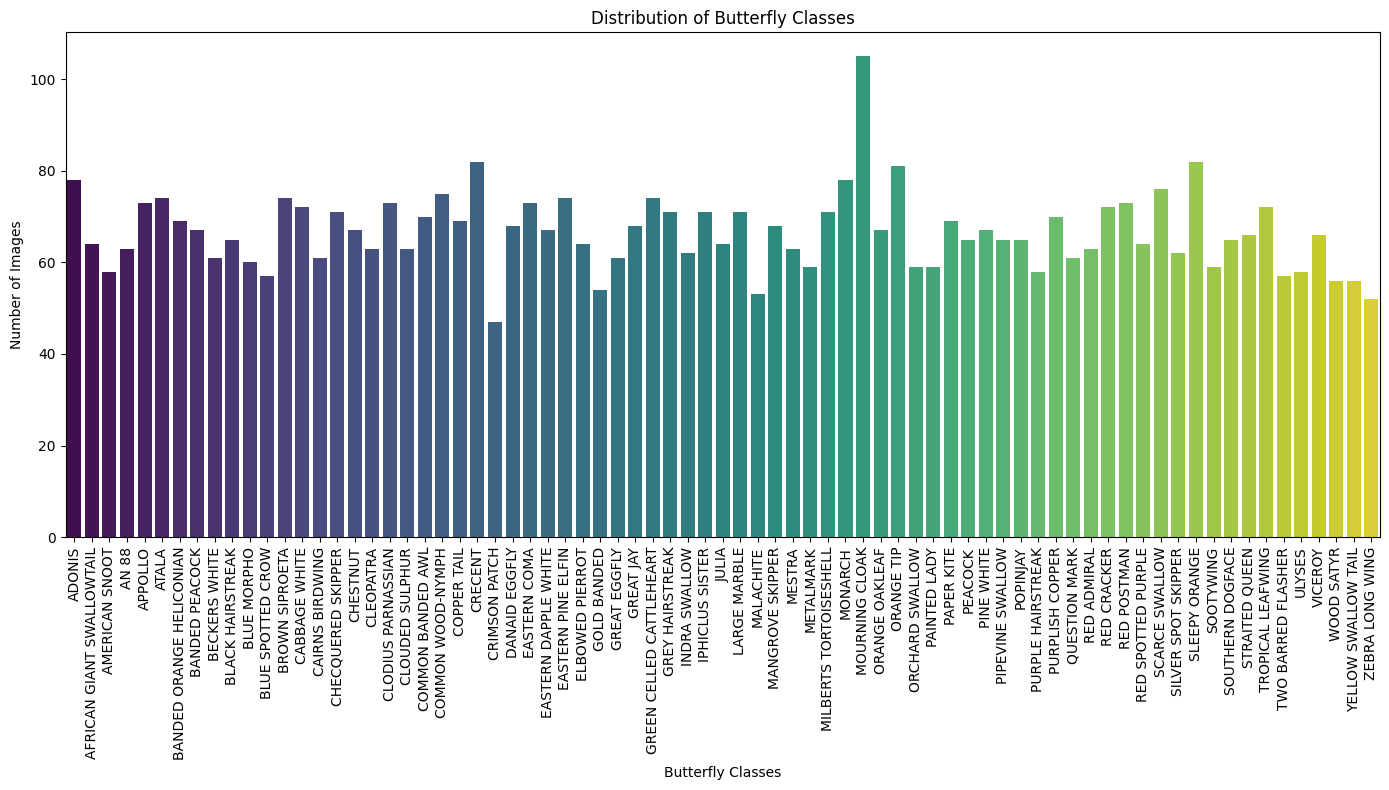

In [24]:
class_counts = df['label'].value_counts().sort_index()

plt.figure(figsize=(14, 8))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribution of Butterfly Classes')
plt.xlabel('Butterfly Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

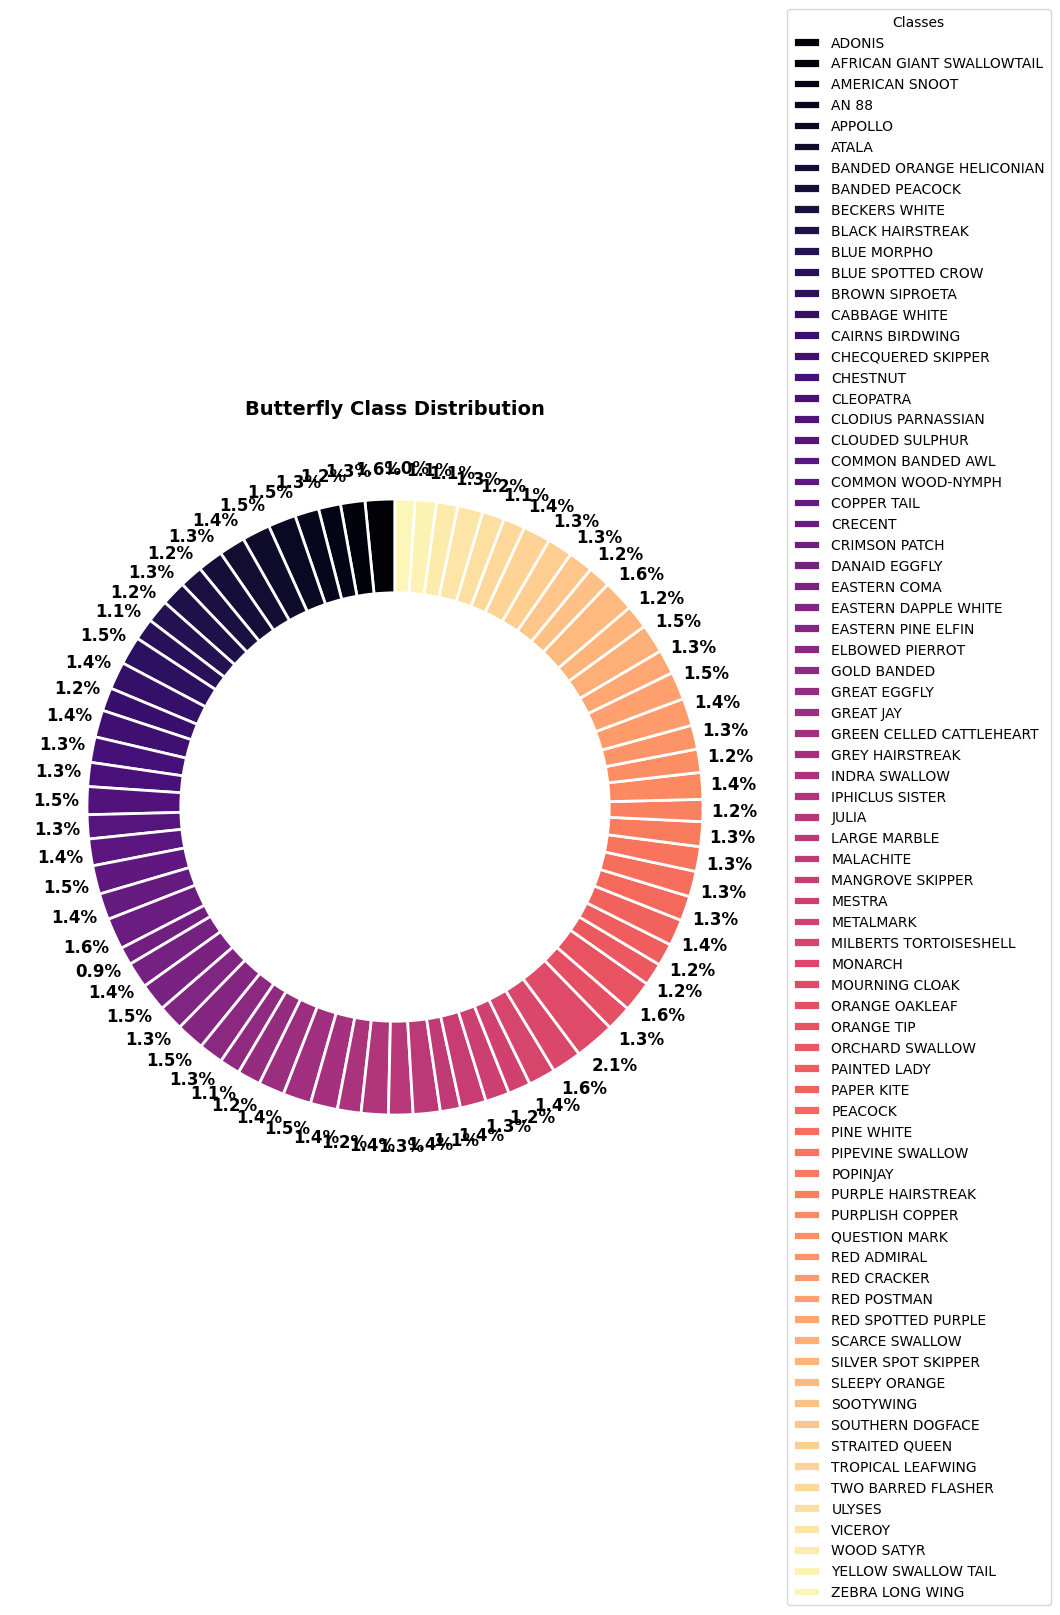

In [25]:
class_counts = df['label'].value_counts().sort_index()
colors = sns.color_palette("magma", len(class_counts))
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    class_counts.values, 
    labels=None, 
    autopct='',  # Hide default percentages
    startangle=90, 
    colors=colors, 
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
for i, (p, label) in enumerate(zip(wedges, class_counts.index)):
    ang = (p.theta2 - p.theta1) / 2.0 + p.theta1  # Angle for text placement
    x = 1.1 * p.r * np.cos(np.radians(ang))
    y = 1.1 * p.r * np.sin(np.radians(ang))
    plt.text(x, y, f"{class_counts.values[i] / class_counts.sum() * 100:.1f}%", 
             ha="center", va="center", fontsize=12, fontweight="bold", color="black")
plt.title('Butterfly Class Distribution', fontsize=14, fontweight="bold")
plt.legend(class_counts.index, title="Classes", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [27]:
image_dir = "/kaggle/input/ai-1810-dpl-302-m-butterfly-image-classification/train/train"

sample_images = df.sample(9, random_state=42)


fig, axes = plt.subplots(3, 3, figsize=(15, 15))


for i, (index, row) in enumerate(sample_images.iterrows()):
    img_path = os.path.join(image_dir, row['filename'])
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0  # Normalize the image
    
    ax = axes[i // 3, i % 3]
    ax.imshow(img_array)
    ax.set_title(f"Class: {row['label']}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [28]:
train_df, val_df = train_test_split(df, test_size=0.18, random_state=42)

image_dir = "/kaggle/input/ai-1810-dpl-302-m-butterfly-image-classification/train/train"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 4100 validated image filenames belonging to 75 classes.
Found 900 validated image filenames belonging to 75 classes.


In [29]:
model_CNN = models.Sequential([
    layers.Conv2D(32, (4, 4), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(75, activation='softmax')
])

model_CNN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model_CNN.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 221, 221, 32)        │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 110, 110, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 108, 108, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      18,874,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 75)                  │          19,275 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,997,067 (72.47 MB)

 Trainable params: 18,997,067 (72.47 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',       # Theo dõi giá trị val_loss (hoặc có thể là val_accuracy)
    patience=10,               # Đợi 5 epoch nếu không cải thiện
    restore_best_weights=True # Khôi phục trọng số tốt nhất khi huấn luyện dừng
)

history = model_CNN.fit(  
    train_generator,
    epochs=50,
    validation_data=val_generator
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


129/129 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.0289 - loss: 4.2243 - val_accuracy: 0.0944 - val_loss: 3.6820
Epoch 2/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.1147 - loss: 3.5920 - val_accuracy: 0.2433 - val_loss: 2.8677
Epoch 3/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.2072 - loss: 3.0183 - val_accuracy: 0.2656 - val_loss: 2.7902
Epoch 4/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.2639 - loss: 2.7313 - val_accuracy: 0.4233 - val_loss: 2.0991
Epoch 5/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.3568 - loss: 2.3191 - val_accuracy: 0.4756 - val_loss: 1.8379
Epoch 6/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.4300 - loss: 2.0359 - val_accuracy: 0.5122 - val_loss: 1.8004
Epoch 7/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.4831 - loss: 1.8176 - val_accuracy: 0.5322 - val_loss: 1.6542
Epoch 8/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.5120 - loss: 1.7173 - val_accuracy: 0.537

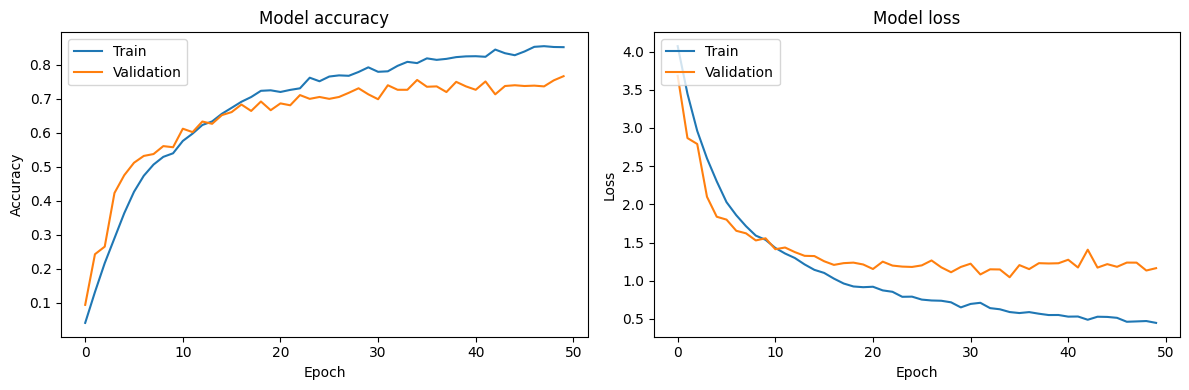

In [31]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [32]:
model_CNN.save("butterfly_model.h5")


In [33]:
from tensorflow.keras.models import load_model

# Tải lại mô hình
model_CNN = load_model("butterfly_model.h5")


In [35]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Định nghĩa thư mục chứa ảnh kiểm thử
test_dir = "/kaggle/input/ai-1810-dpl-302-m-butterfly-image-classification/test/test"

# Đọc dữ liệu từ thư mục test
test_df = pd.DataFrame({
    "ID": sorted(os.listdir(test_dir))  # Lấy danh sách ảnh và sắp xếp
})

# Tạo ImageDataGenerator chỉ rescale ảnh (giống như khi train)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Tạo test generator
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_dir,
    x_col="ID",  # Cột chứa tên file ảnh
    target_size=(224, 224),  # Kích thước ảnh phù hợp với mô hình
    batch_size=32,
    class_mode=None,  # Không có nhãn vì đây là tập test
    shuffle=False  # Để giữ thứ tự file
)


Found 1499 validated image filenames.


In [36]:
# Dự đoán trên tập test
predictions = model_CNN.predict(test_generator)

# Lấy chỉ số lớp dự đoán cao nhất
predicted_classes = np.argmax(predictions, axis=1)

# Mapping số lớp về tên lớp
class_indices = train_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}  # Đảo key-value để ánh xạ số về tên

# Chuyển đổi chỉ số lớp thành tên lớp
predicted_labels = [class_names[label] for label in predicted_classes]

# Tạo DataFrame với "ID" và "label"
submission_df = pd.DataFrame({
    "ID": test_df["ID"],  # ID từ test file
    "label": predicted_labels  # Dự đoán từ mô hình
})

# Lưu file CSV
submission_df.to_csv("submission.csv", index=False)

# Kiểm tra lại kết quả
submission_df.head()

47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 373ms/step


ID           label
0     Image_1.jpg  SCARCE SWALLOW
1    Image_10.jpg  STRAITED QUEEN
2   Image_100.jpg          ULYSES
3  Image_1000.jpg   INDRA SWALLOW
4  Image_1001.jpg         MONARCH

In [37]:
from IPython.display import FileLink

# Hiển thị link để tải file submission.csv
FileLink(r'submission.csv')


/kaggle/working/submission.csv